# Team name: Pandas 

# Problem statement 1: PS1 - Description - Concrete cracking is a major issue in Bridge Engineering. Detection of cracks facilitates the design, construction and maintenance of bridges effectively.

# Team leader: SHREE HARI B

# Institution name: Karunya institute of technology and sciences, coimbatore

In [120]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import regularizers

In [121]:
IMAGE_SIZE=[224,224]

In [122]:
train_path="F:\crackdetection\train"
test_path="F:\crackdetection\test"

In [123]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [124]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [125]:
  # useful for getting number of output classes
folders = glob("F:/crackdetection/train/*")

In [126]:
len(folders)

2

In [127]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [128]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [129]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [130]:
from tensorflow.keras.layers import MaxPooling2D
# Define the regularization term
l2_reg = regularizers.l2(0.001)

In [131]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu",kernel_regularizer=l2_reg))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 28, 28, 64)      

In [132]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [133]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [134]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('F:/crackdetection/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 700 images belonging to 2 classes.


In [135]:
training_set

In [136]:
test_set = test_datagen.flow_from_directory('F:/crackdetection/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [137]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=4,
                                                              restore_best_weights=True)])

C:\Users\B SHREE HARI\AppData\Local\Temp\ipykernel_23404\2253253766.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
22/22 [==============================] - 17s 722ms/step - loss: 2.1246 - accuracy: 0.5657 - val_loss: 1.0452 - val_accuracy: 0.5300
Epoch 2/10
22/22 [==============================] - 17s 783ms/step - loss: 0.9253 - accuracy: 0.6786 - val_loss: 0.8642 - val_accuracy: 0.6650
Epoch 3/10
22/22 [==============================] - 18s 802ms/step - loss: 0.7326 - accuracy: 0.8257 - val_loss: 0.7503 - val_accuracy: 0.7275
Epoch 4/10
22/22 [==============================] - 18s 804ms/step - loss: 0.5996 - accuracy: 0.8557 - val_loss: 0.7021 - val_accuracy: 0.7125
Epoch 5/10
22/22 [==============================] - 17s 787ms/step - loss: 0.5521 - accuracy: 0.8657 - val_loss: 0.6296 - val_accuracy: 0.7675
Epoch 6/10
22/22 [==============================] - 19s 873ms/step - loss: 0.4945 - accuracy: 0.8900 - val_loss: 0.6756 - val_accuracy: 0.7225
Epoch 7/10
22/22 [==============================] - 21s 964ms/step - loss: 0.5015 - accuracy: 0.8743 - val_loss: 0.6079 - val_accuracy: 0.7425

In [138]:
x_test, y_test = test_set.next()

In [139]:
from sklearn.metrics import classification_report

In [140]:
# make predictions on the test set
predictions = model.predict(x_test)
# convert the predictions to class labels
y_pred = np.argmax(predictions, axis=1)
# convert the ground truth labels to one-hot encoded vectors
y_true = np.argmax(y_test, axis=1)

# generate the classification report
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 143ms/step
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.93      0.74      0.82        19

    accuracy                           0.81        32
   macro avg       0.82      0.83      0.81        32
weighted avg       0.84      0.81      0.81        32



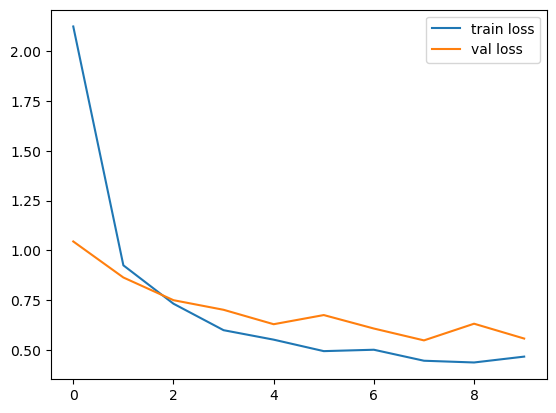

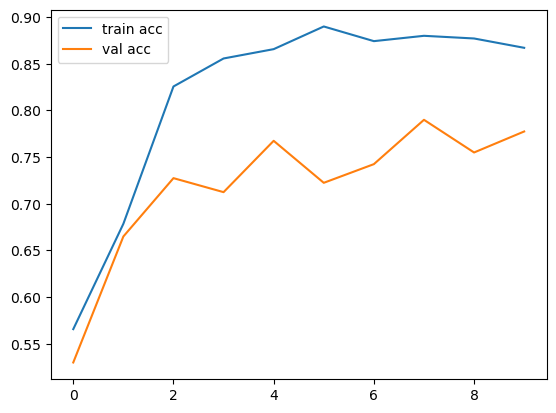

<Figure size 640x480 with 0 Axes>

In [141]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [142]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [143]:
y_pred = model.predict(test_set)

13/13 [==============================] - 1s 90ms/step


In [144]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [145]:
model=load_model('model_vgg19.h5')

1/1 [==============================] - 0s 29ms/step


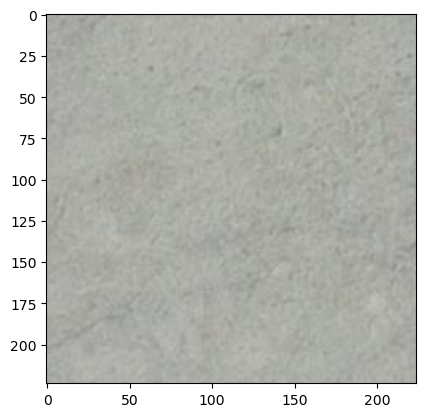

In [152]:
img_path='F:/crackdetection/test/Negative/DJI_0669_14_9.jpg'
image = load_img(img_path, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
yhat = model.predict(image)
plt.imshow(load_img(img_path))

In [153]:
yhat

array([[1., 0.]], dtype=float32)

In [154]:
import numpy as np

# Example array
array = np.array(yhat, dtype=np.float32)

# Convert the array to a 1D list
list_1d = array.flatten().tolist()

# Print the 1D list
x =list_1d[0]
if int(x)==0:
    print("Positive, it has a crack")
else:
    print("Negative, it does not have a crack")

Negative, it does not have a crack
